# Phase 3 Independent project

Student name
- Loise Mburuga

Instructor name:
- Noah Kandie
- William Okomba




# INTRODUCTION

Businesses around the world have at some point in their life cycle experienced customer switch / churn, which in extreme cases led to their downfall. The Telecommunication industry has not been spared either. Customer churn refers to customer exit from an entity by way of failing to renew subscriptions and patronising a competitor business. In order to retain their customers and potentially increase its market share, SyriaTel a Telecom company wishes to know how much money it loses due to customer churn and if there are predictable patterns they may have missed out on.


# BUSINESS UNDERSTANDING

SyriaTel, a Telecom company has been experiencing customer churn which has led to decrease in market share resulting in losses. To turn this around, SyriaTel intends to implement calculated strategies to retain their clients and improve profitability.

# DATA UNDERSTANDING

The dataset holds information on SyriaTel's customers subscription, usage trends, demographics and calls made to customer care department. The features in the dataset include:

a. state: Refers to general location where the customer is located

b. account length: Period a customer has been with the company in months

c. area code: area where customer is located

d. phone number: customer's number

e. intl plan: whether client has a package for international calls yes or no

f. voice mail plan: whether client has a package for voice mail service yes or no

g. number vmail message: number of voicemail messages received

h. total day minutes: total minutes used during the day 

i. total day calls: total number of calls made during the day

j. total day charge: total billed for day calls

k. total eve calls: number of calls made in the evening

l. total eve charge: total billed for evening calls

m. total night minutes: total number of minutes used at night

n. total night calls: total number of night calls made

o. total night charge: total amount billed at night

p. total intl minutes: total minutes spent on international calls

q. total intl calls: total number of international calls made

r. total intl charge: total billed for international calls

s. customer service calls: no. of calls made to customer service

t. churn: whether customer stayed or left the company yes or no

# PROBLEM STATEMENT

The aim of this project is to create a predictive model that will potentially identify customers who are are likely to churn based on historical data. Ultimately, the goal is to identify the customers' likelihood to switch to competitors and employ a retention strategy.

# OBJECTIVES

i.) Identify key factors influencing customer churn

Investigate location-related attributes like area code and geographic coordinates to further understand whether certain areas have poor reception.

ii). Evaluate Model Performance

Utilize metrics such as Accuracy, F1Score, Recall , and mean squared error to assess the model's effectiveness in accurately predicting customer churn.

iii). Provide Actionable Recommendations

Offer practical strategies to Syria Telecom that will enhance customer retention, customer satisafaction, increase profitabilty and ultimately the market share.

# TABLE OF CONTENTS

1. Data Preparation
2. Data Cleaning
3. Exploratory Data Analysis
4. Modelling
5. Evaluation
6. Conclusion
7. Recommendations

# 1. DATA PREPARATION

In [1]:
# Import the necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization.
from pandas.api.types import is_numeric_dtype  # Used to check if a data type is numeric.
%matplotlib inline
import seaborn as sns  # for enhanced data visualization.

from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF).
from statsmodels.graphics.regressionplots import plot_partregress_grid  # For partial regression plots.
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets.
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection.
from sklearn.preprocessing import StandardScaler  # Standardizing/Scaling features.
from sklearn.preprocessing import PolynomialFeatures  # Generate polynomial features.
from sklearn.linear_model import LinearRegression, LogisticRegression # Linear Regression model.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for model performance.
import statsmodels.api as sm
!pip install scikit-learn imbalanced-learn

from scipy.stats import kstest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis# Create an instance of LDA
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC

 # Statsmodels is used to create statistical models.
from scipy import stats  # Scientific computing library for statistical tests.
from scipy.stats import ttest_ind  # Independent sample t-test for comparing means.
import warnings  # handle warnings during code execution.
warnings.filterwarnings("ignore")  # Ignore warnings to improve code readability.sns.boxplot(df1['customer_service_calls'], ax=ax18)


In [2]:
#Load and preview the dataset
df= pd.read_csv('Syria_Telcom.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**The columns have four data types**:
- Boolean which entails churn.
 
- Object which includes: state, phone number, international plan and voice mail plan.
    
- Float which includes: total intl charge, total intl minutes, total night charge, total night minutes, total eve charge,         total eve minutes, total day charge, total day minutes.

- Integer which entails: customer service calls, total intl calls, total night calls, total eve calls, total day calls,           number vmail messages, area code, account length.
    
The data contains 3333 rows and 21 columns.

# **2. DATA CLEANING**

Data cleaning involves the process of identifying and resolving issues related to the quality of the dataset. Its primary objective is to ensure that the data is accurate, consistent, and devoid of errors. Below are some of the data cleaning and preparation methods that were employed:
1.  Checking for missing values
2.  Checking for duplicates
3.  Transforming the data
4.  Checking for outliers


In [6]:
# Create a new dataframe of the raw data to clean
df1 = pd.read_csv('Syria_Telcom.csv')

In [7]:
# Dropping columns
df2 = df1.drop(['state', 'phone number'], axis=1)
df2.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# Display original column names
print('Original columns:', df1.columns)

# Column names have whitespace and should be renamed

Original columns: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [9]:
# Proceed to rename the columns
# Correctly renaming the columns using a dictionary
df2.rename(columns={
    'account length': 'account_length',
    'area code': 'area_code',
    'international plan': 'international_plan',
    'voice mail plan': 'voice_mail_plan',
    'number vmail messages': 'number_vmail_messages',
    'total day minutes': 'total_day_minutes',
    'total day calls': 'total_day_calls',
    'total day charge': 'total_day_charge',
    'total eve minutes': 'total_eve_minutes',
    'total eve calls': 'total_eve_calls',
    'total eve charge': 'total_eve_charge',
    'total night minutes': 'total_night_minutes',
    'total night calls': 'total_night_calls',
    'total night charge': 'total_night_charge',
    'total intl minutes': 'total_intl_minutes',
    'total intl calls': 'total_intl_calls',
    'total intl charge': 'total_intl_charge',
    'customer service calls': 'customer_service_calls',
    'churn': 'churn'
}, inplace=True)


In [10]:
# Confirm that columns have been renamed
df2.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# calculate the percentage of missing columns
df2.isnull().sum()

account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [12]:
# check for duplicated values
df2.duplicated().any()

# There are no duplicated values

False

In [13]:
#Change categorical data to numerical data
# columns to convert
df2['international_plan'].unique()
df2['international_plan'] = df2['international_plan'].apply({'no':0, 'yes':1}.get)
df2.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
df2['voice_mail_plan'].unique()
df2['voice_mail_plan'] = df2['voice_mail_plan'].apply({'no':0, 'yes':1}.get)
df2.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df2['churn'].unique()
#df1['churn'] = df1['churn'].apply({'False':0, 'True':1}.get)
df2['churn'] = df2['churn'].map({True: 1, False: 0})
df2.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
#Check for placeholders
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan",'NaN' "none", "None", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df1.columns:
    unique_values = df1[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (df1[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


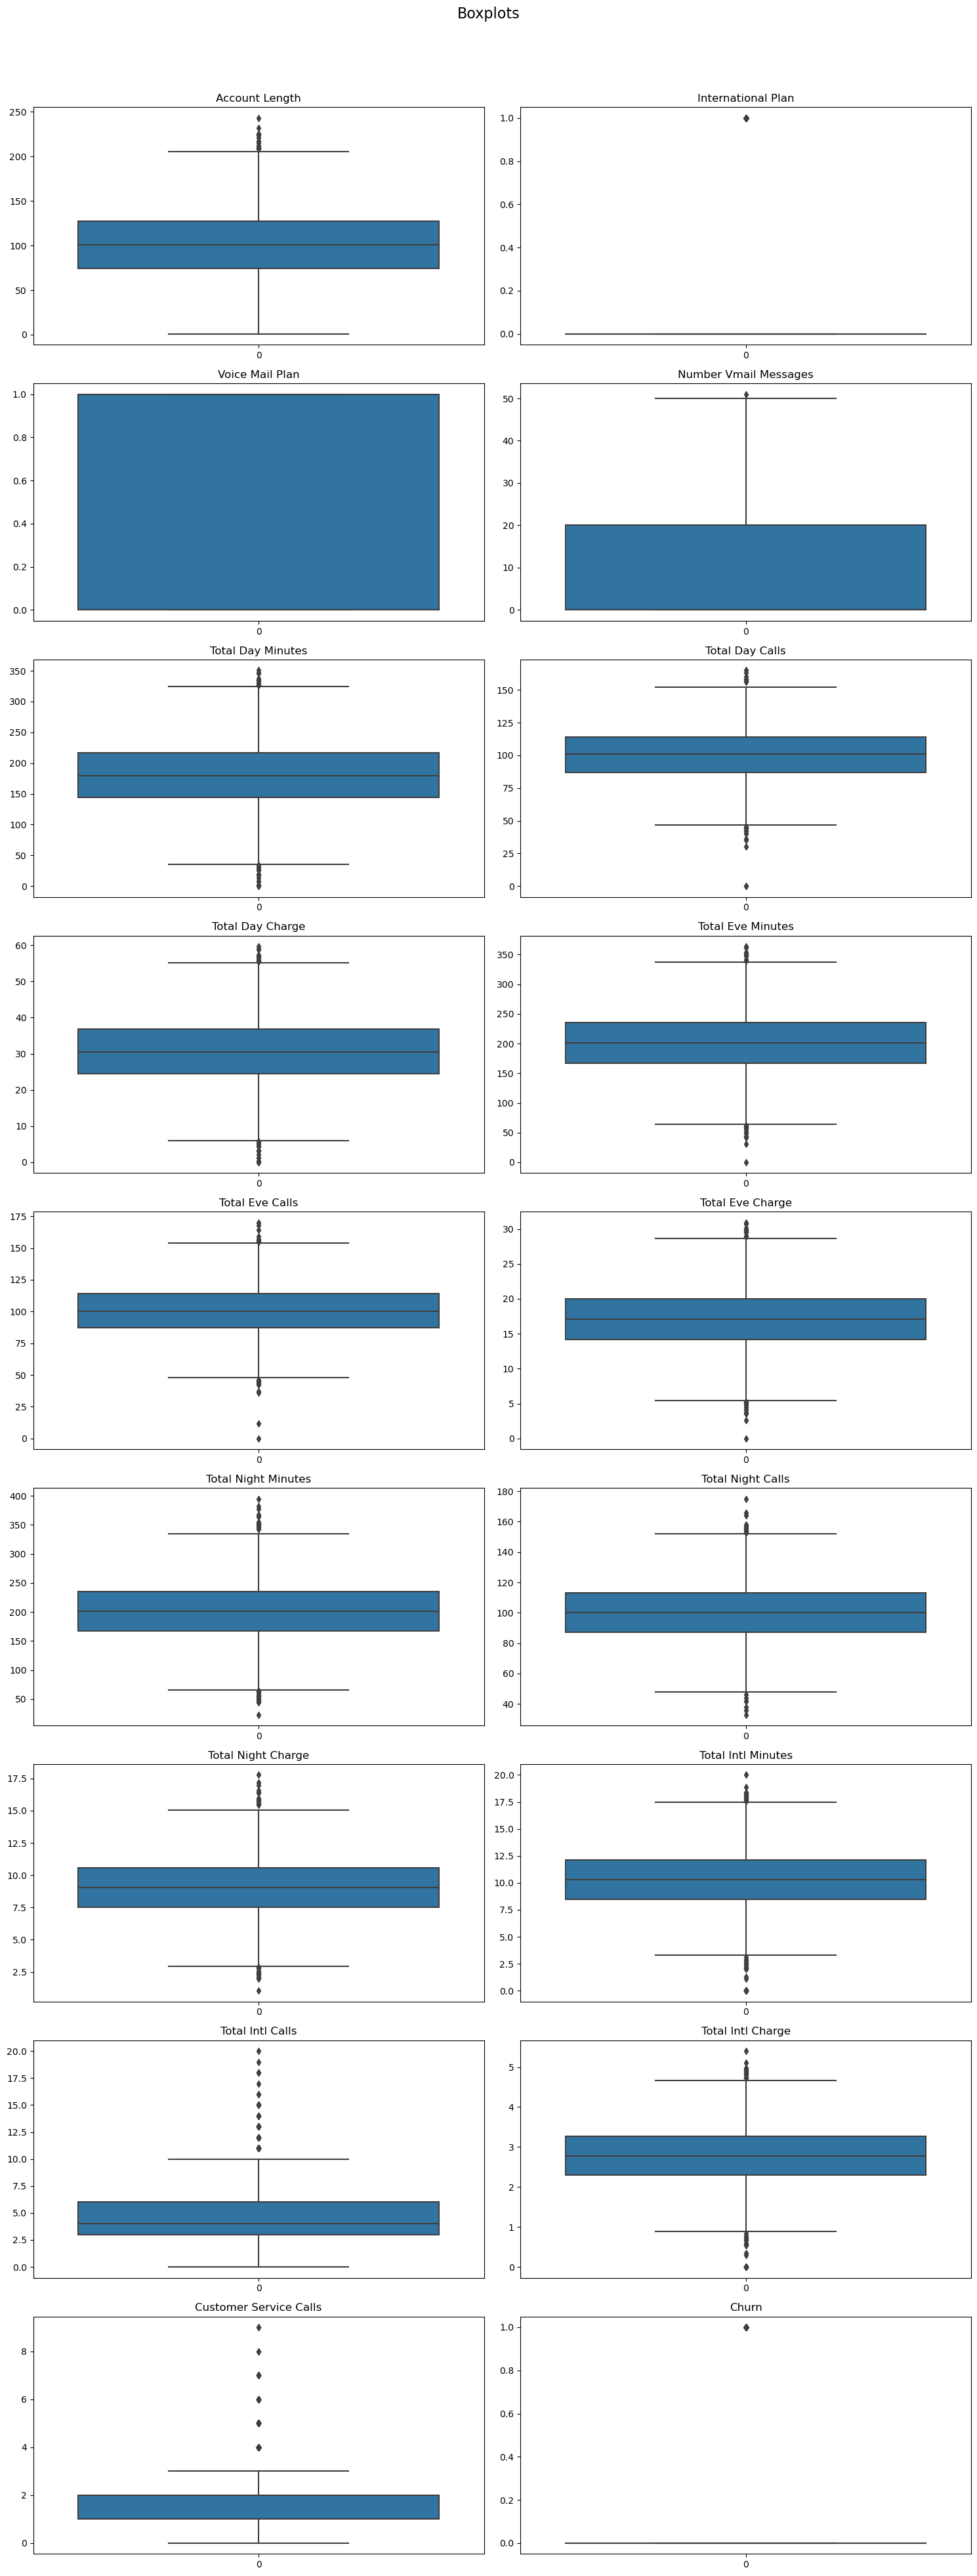

In [17]:
#Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#DataFrame `df2` should be defined here
df2

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18)) = plt.subplots(9, 2, figsize=(15, 40))

fig.suptitle('Boxplots', fontsize=16)

# Define the titles
titles = [
    'Account Length', 'International Plan', 'Voice Mail Plan', 'Number Vmail Messages',
    'Total Day Minutes', 'Total Day Calls', 'Total Day Charge', 'Total Eve Minutes',
    'Total Eve Calls', 'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls',
    'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls', 'Total Intl Charge',
    'Customer Service Calls', 'Churn'
]

# Create a list of all the axes
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18]

# List of columns in the same order as titles
columns = [
    'account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages',
    'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
    'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
    'customer_service_calls', 'churn'
]

# Loop through axes, titles, and columns together to set up the plots
for ax, title, column in zip(axes, titles, columns):
    sns.boxplot(df2[column], ax=ax)
    ax.set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

<Axes: >

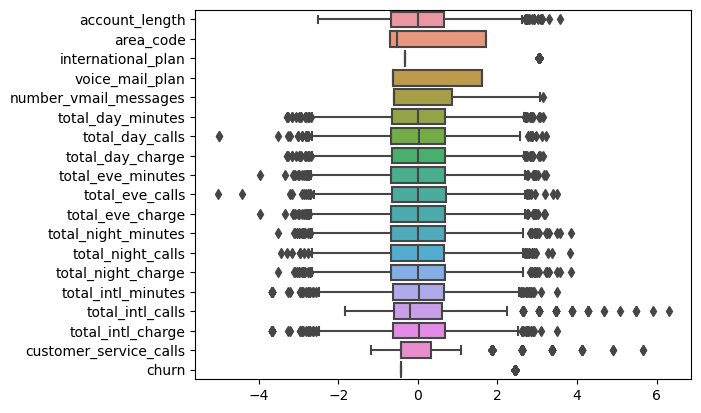

In [106]:
# Looking for outliers
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2),columns= df2.columns)
sns.boxplot(df_scaled, orient= 'h')


In [19]:
# Checking for Anomalies using Z-score#
numerical_columns = df2[['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn']]

from scipy import stats
z = np.abs(stats.zscore(numerical_columns))
print(z)

      account_length  area_code  international_plan  voice_mail_plan  \
0           0.676489   0.523603            0.327580         1.617086   
1           0.149065   0.523603            0.327580         1.617086   
2           0.902529   0.523603            0.327580         0.618396   
3           0.428590   0.688834            3.052685         0.618396   
4           0.654629   0.523603            3.052685         0.618396   
...              ...        ...                 ...              ...   
3328        2.283878   0.523603            0.327580         1.617086   
3329        0.830437   0.523603            0.327580         0.618396   
3330        1.835055   1.718817            0.327580         0.618396   
3331        2.082955   1.718817            3.052685         0.618396   
3332        0.679745   0.523603            0.327580         1.617086   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                  1.234883           1.566767         0.476643   
1

# 3. EXPLORATORY DATA ANALYSIS

## a.) Univariate

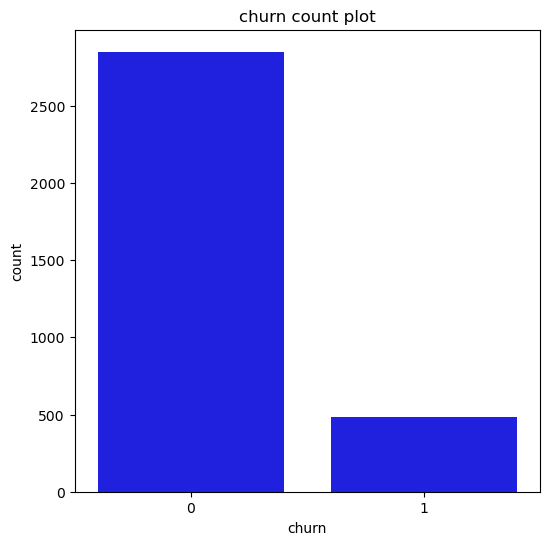

In [77]:
plt.figure(figsize=(6,6))
sns.countplot(x=df2['churn'], color='b')
plt.title("churn count plot")
plt.show()

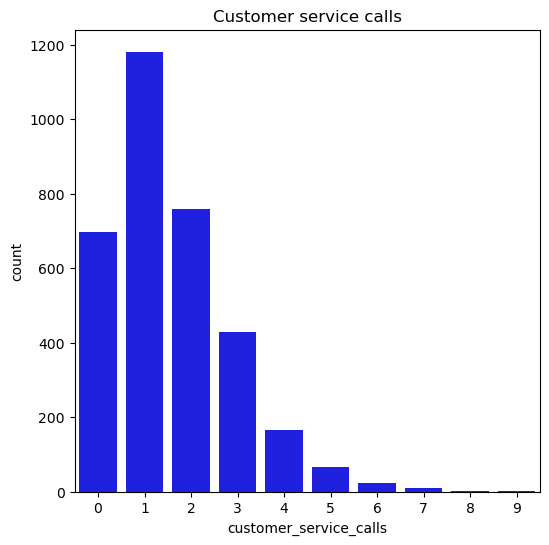

In [78]:
plt.figure(figsize=(6,6))
sns.countplot(x=df2['customer_service_calls'], color='b')
plt.title("Customer service calls")
plt.show()

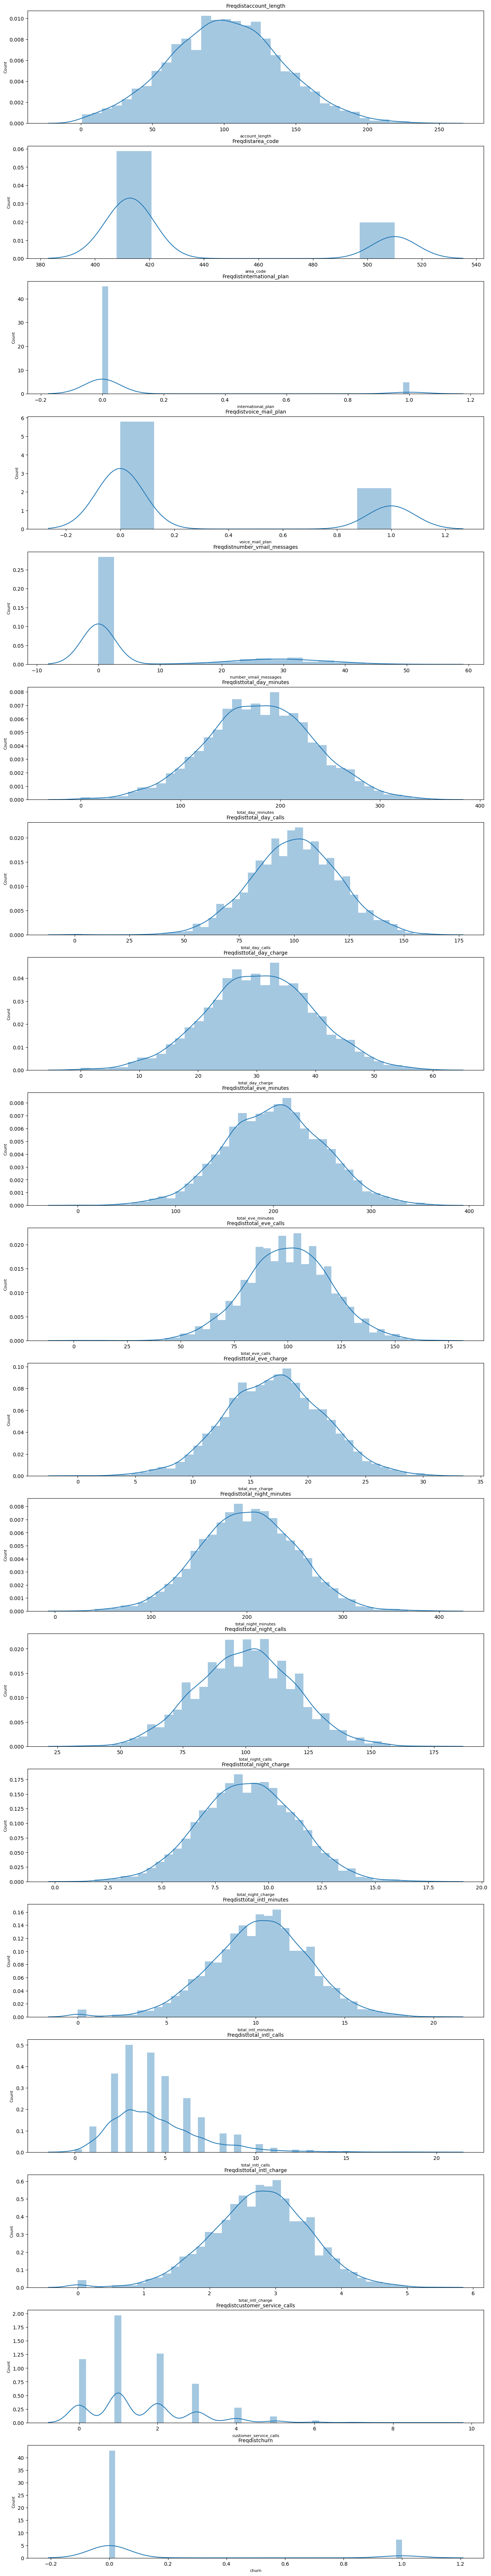

In [20]:
# Plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF

column_names = ['account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn']
fig, ax = plt.subplots(len(column_names), figsize=(16,90))


for i, col_val in enumerate(column_names):
  sns.distplot(df2[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Freqdist'+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize = 8)

plt.show()

# Observation

1. customer_service_calls has a multimodal distribution

2. international_plan has a right skew

3. The variables total_intl_charge, total_intl_minutes, total_night_charge, total_night_calls,     total_night_minutes, total_eve_charge, total_eve_calls, total_eve_minutes, total_day_charge, total_day_calls, total_day_minutes and account_length have histograms that are symmetric or almost symmetrical; they have a somewhat normal distribution.

<Axes: title={'center': 'Frequency distribution of churn'}, xlabel='churn'>

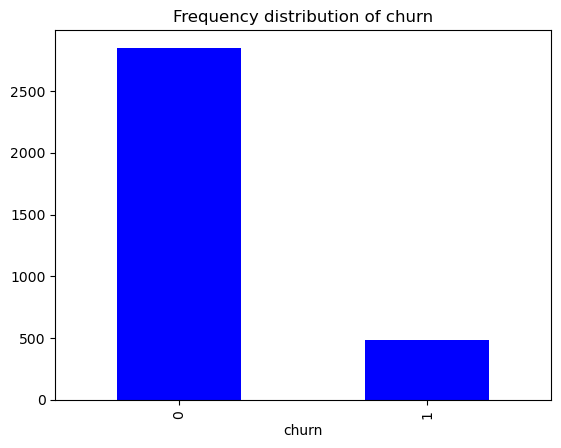

In [61]:
df2['churn'].value_counts(). plot.bar(title = 'Frequency distribution of churn', color = 'blue')

Few customers will churn as indicated by the column True

<Axes: title={'center': 'Frequency distribution of voice_mail_plan'}, xlabel='voice_mail_plan'>

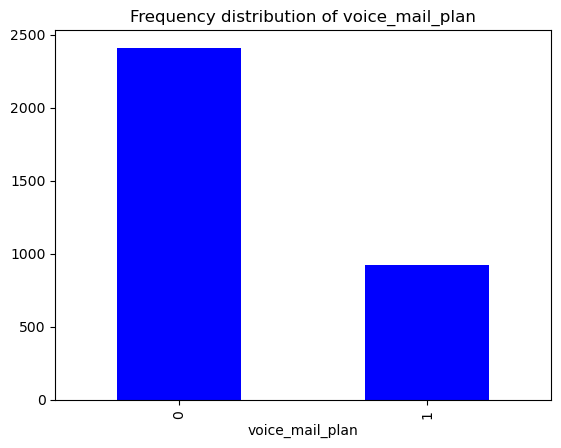

In [22]:
df2['voice_mail_plan'].value_counts(). plot.bar(title = 'Frequency distribution of voice_mail_plan', color = 'blue')

Most customers do not have a voice mail plan as indicated by the 0 /no bar.

<Axes: title={'center': 'Frequency distribution of area_code'}, xlabel='area_code'>

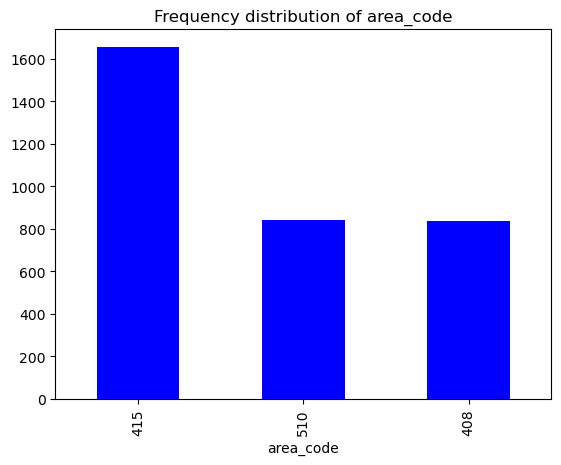

In [50]:
df2['area_code'].value_counts(). plot.bar(title = 'Frequency distribution of area_code', color = 'blue')

Customers in area code 415 are more prone to churn 

<Axes: title={'center': 'Frequency distribution of international_plan'}, xlabel='international_plan'>

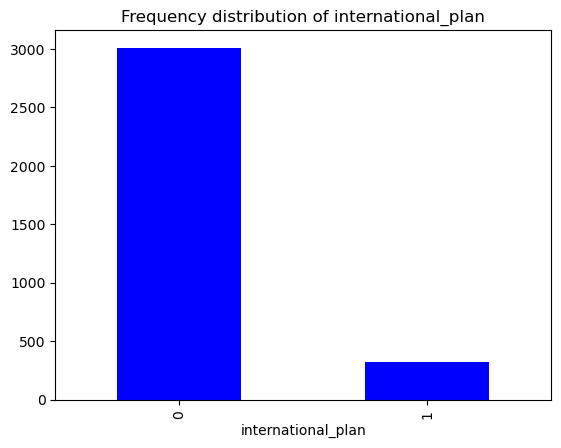

In [58]:
df2['international_plan'].value_counts(). plot.bar(title = 'Frequency distribution of international_plan', color = 'blue')

# b.) Bivariate

**Observations**
1. The variables total_day_minutes_ and total_day_charge have a perfect positive correlation.
2. The variables voice_mail and n_vmailmessages have a strong positive correlation
3. The variable total_intl_charge and total_intl_minutes have a perfect positive correlation.
4. The variable total_night_charge and total_night_minutes have a perfect positive correlation.
5. The variable total_eve_charge and total_eve_minutes have a perfect positive correlation.

The variables with the highest correlation to churn include:
- international_plan
- total_day_ minutes
- total_day_charge
- customer_service calls

While the features with least correlation to churn include:
- total_intl_calls
- total_vmail_plan
- total_vmail_messages

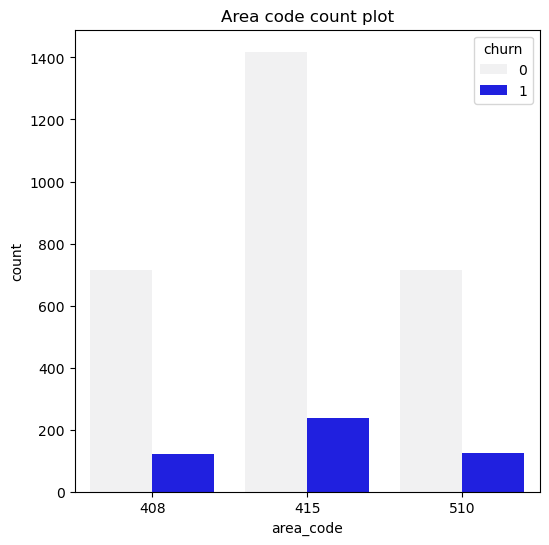

In [98]:
#Bivariate analysis
plt.figure(figsize=(6,6))
sns.countplot(x=df2['area_code'], hue=df2['churn'] , color='b')
plt.title("Area code count plot")
plt.show()

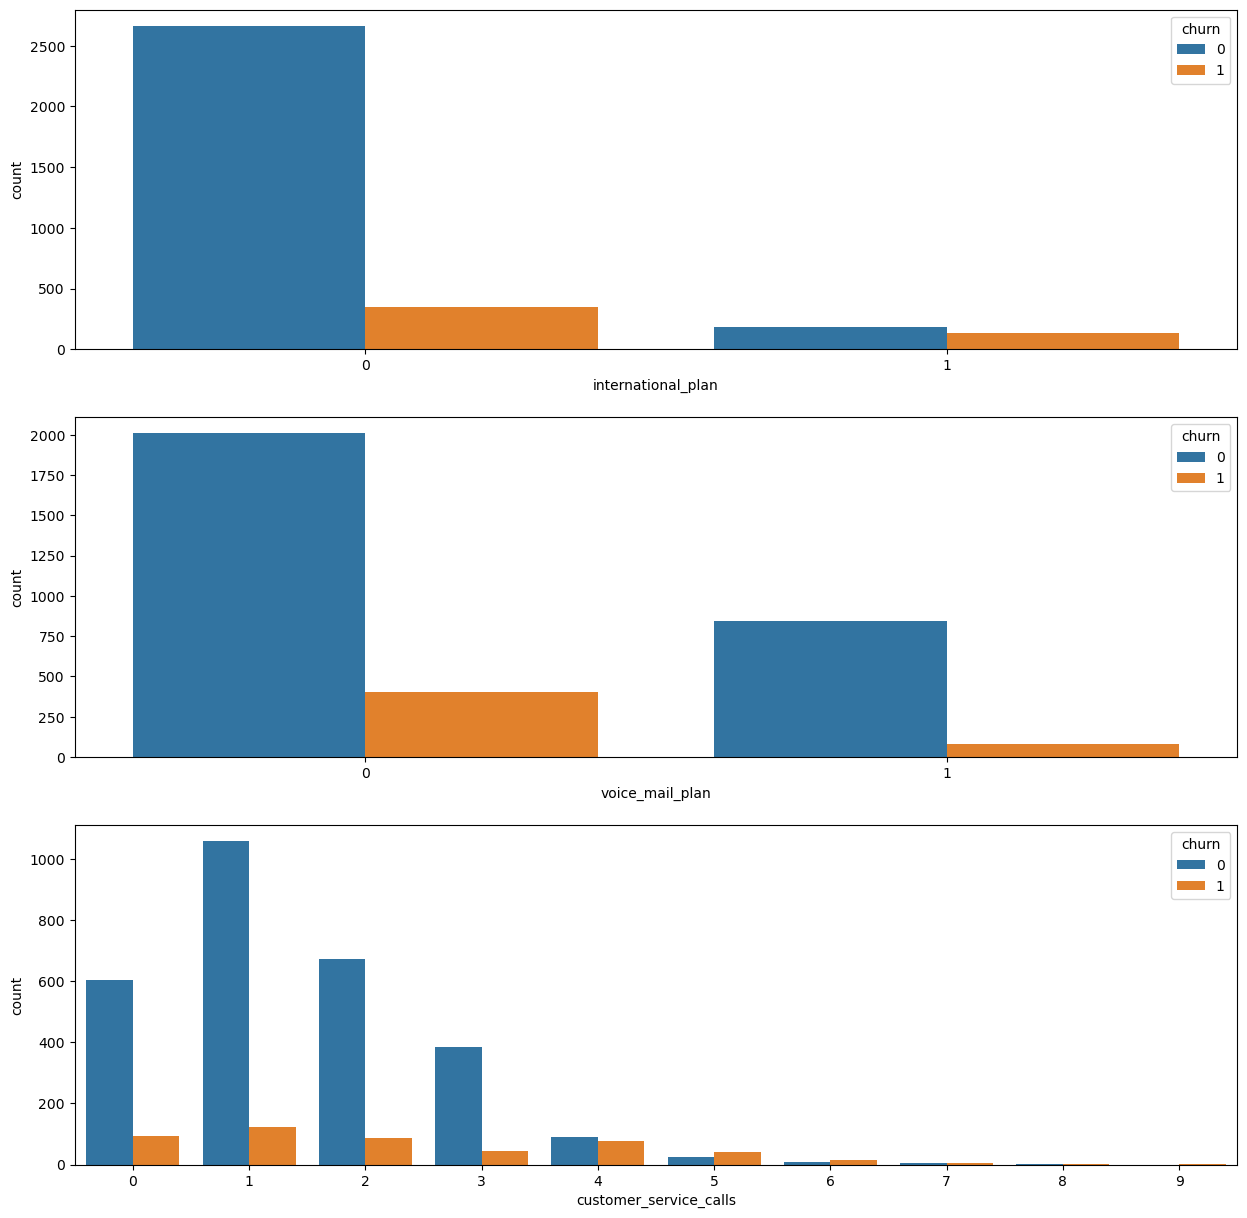

In [97]:
# Define how the axes of plots
f, axes = plt.subplots(3, 1, figsize=[15, 15])

# Correct the countplot calls
sns.countplot(x='international_plan', hue='churn', data=df2, ax=axes[0])
sns.countplot(x='voice_mail_plan', hue='churn', data=df2, ax=axes[1])
sns.countplot(x='customer_service_calls', hue='churn', data=df2, ax=axes[2])
plt.show()


**Observation**
1. Customers who made 1 customer service call are less likely to churn

2. Customers without a voice mail plan are less likely to churn.

3. Customers who lack an international plan are less prone to churn.


<Axes: >

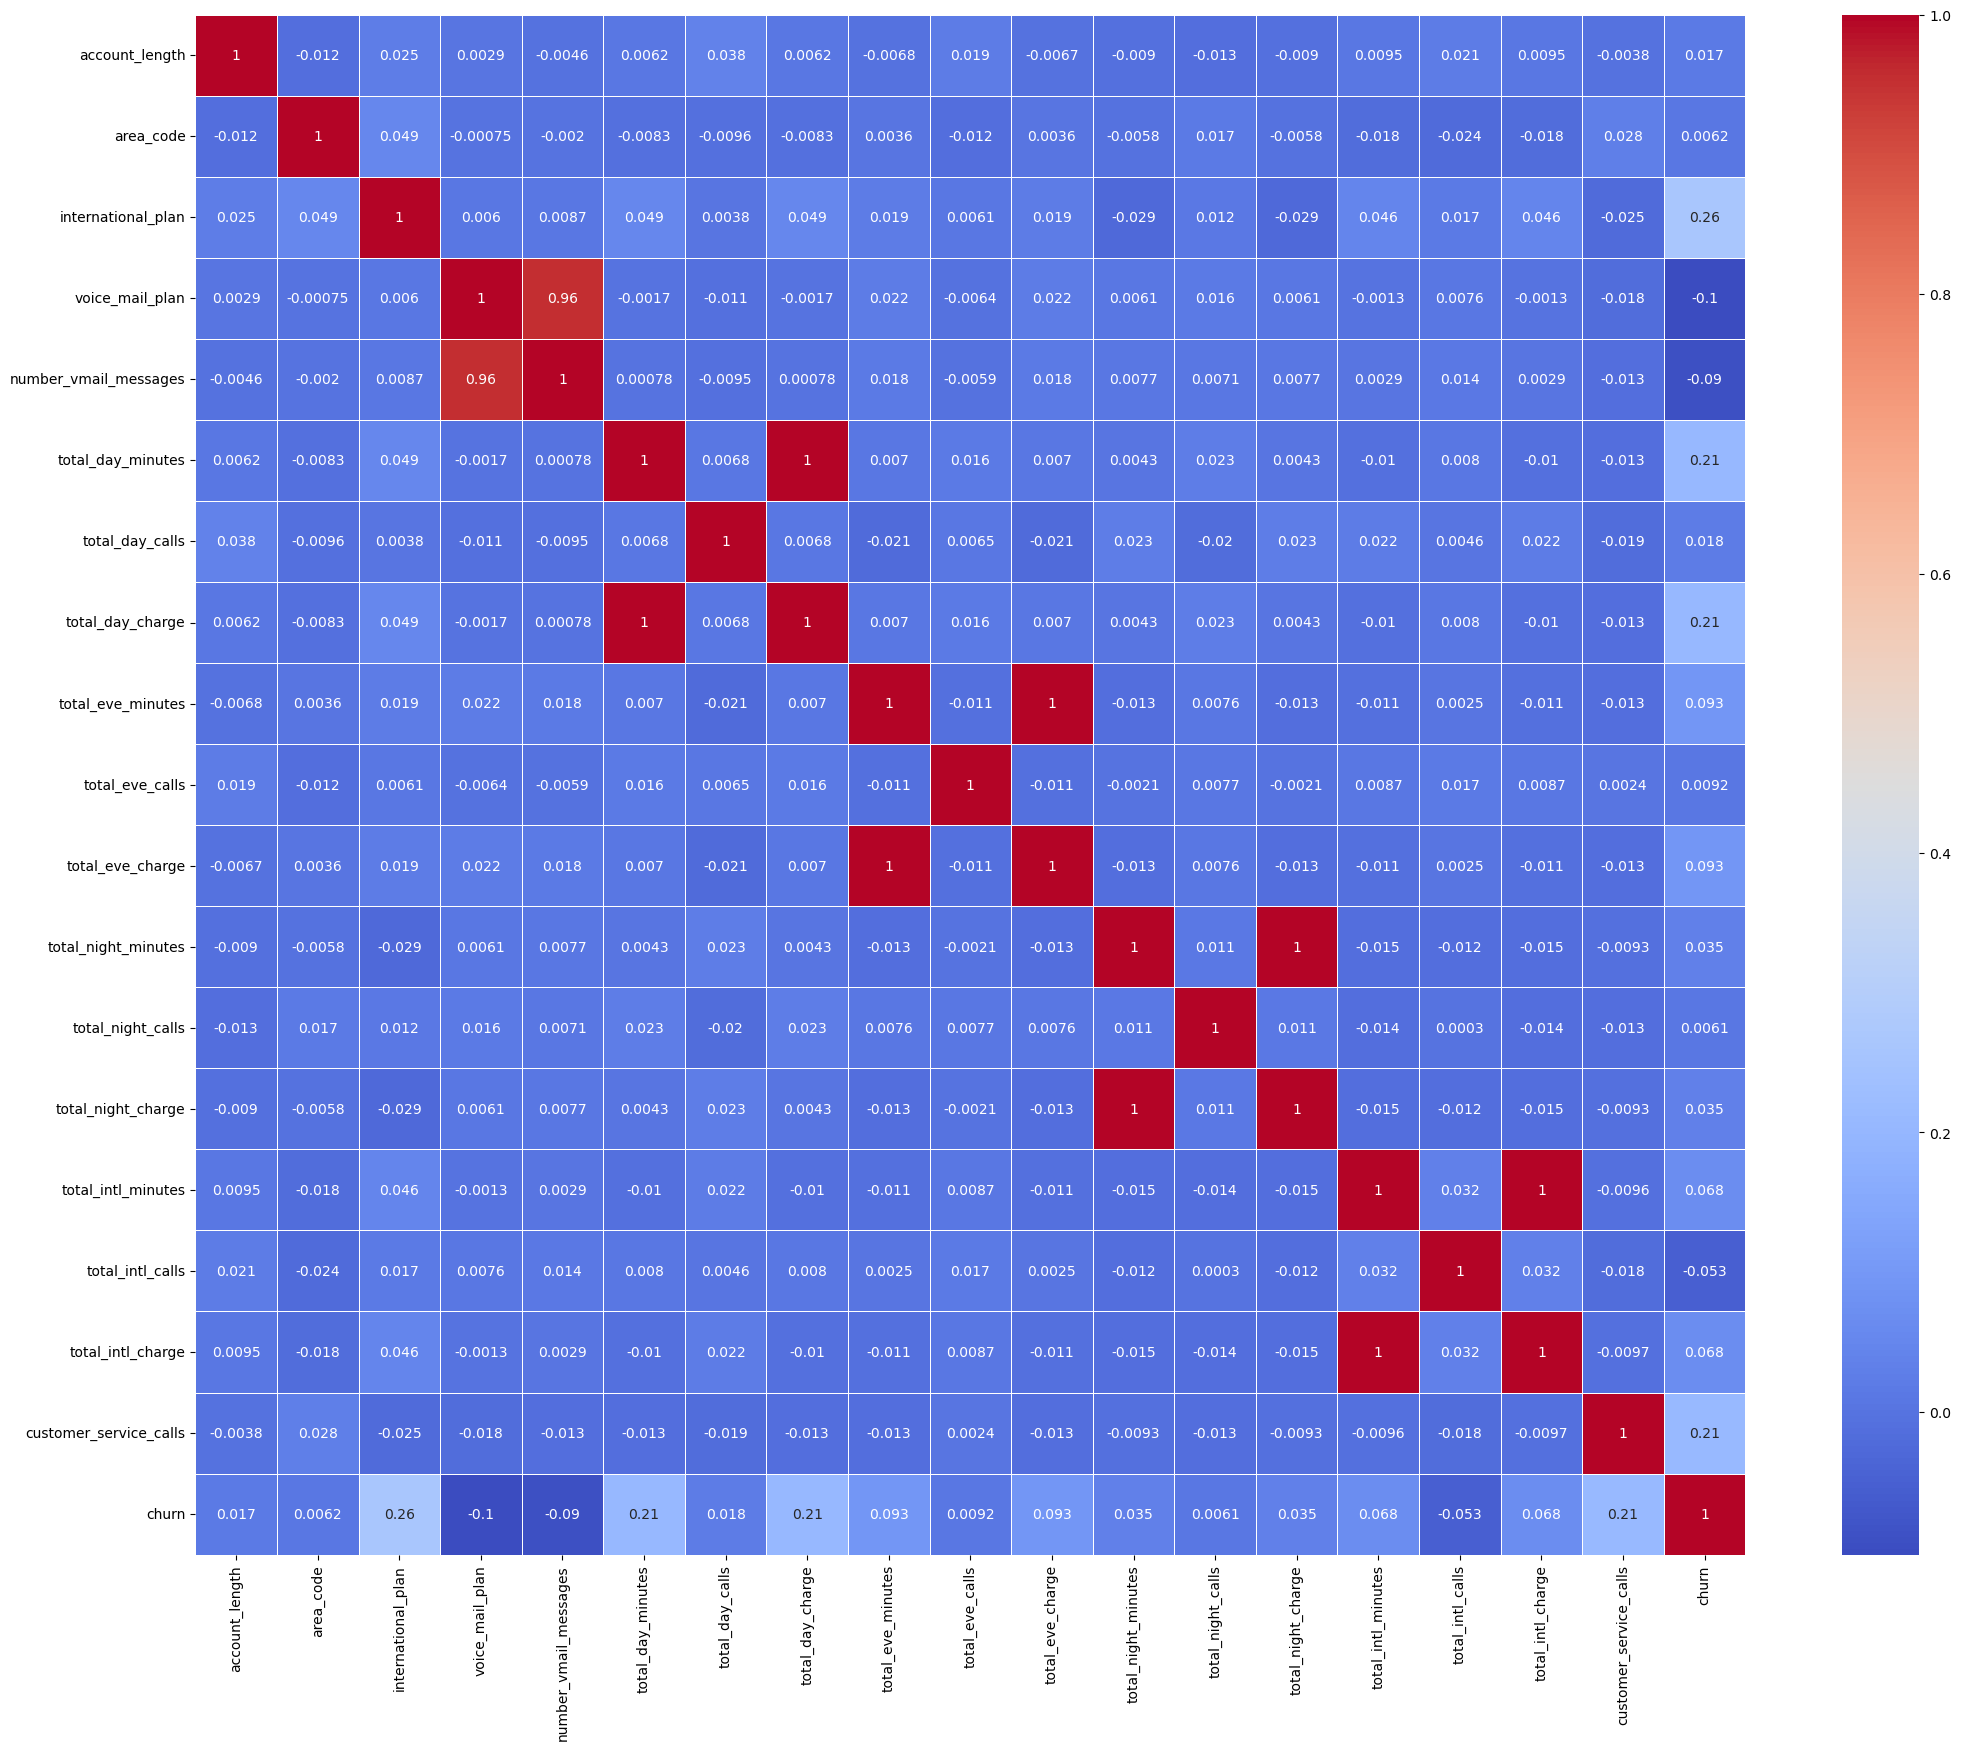

In [23]:
# Bivariate analysis
#Create a correlation matrix
correlation = df2.corr()
correlation


fig, ax = plt.subplots(figsize=(25, 20)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax, cmap="coolwarm")

# c.) Multivariate

In [25]:
# Define X and y variables
X = df2.iloc[:, 2:]
y = df2['churn']


In [26]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Scale the features so they are uniform

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis# Create an instance of LDA

lda = LinearDiscriminantAnalysis()

# Fit the LDA onto our X and y variables
lda_technique = lda.fit(X_train, y_train)

# Show the coeficients of the reduced columns
lda_technique.coef_

array([[ 2.16783503e+00,  9.45467858e+00, -9.46181977e+00,
         3.91092392e+05,  2.59539313e+00, -3.91092366e+05,
         2.96272627e+03,  1.79289029e+00, -2.96062792e+03,
         4.62275809e+03, -4.36575984e-02, -4.62301608e+03,
        -6.58397517e+02,  3.16887735e-01,  6.59515027e+02,
         2.30909998e-01,  9.09404089e+27]])

In [29]:
# Create a datframe from the array so as to extract the column names
new = pd.DataFrame(index = X.columns.values, data = lda_technique.coef_[0].T)
new.sort_values(0, ascending=False)

,0
churn,9.094041e+27
total_day_minutes,3.910924e+05
total_night_minutes,4.622758e+03
total_eve_minutes,2.962726e+03
total_intl_charge,6.595150e+02
voice_mail_plan,9.454679e+00
total_day_calls,2.595393e+00
international_plan,2.167835e+00
total_eve_calls,1.792890e+00
total_intl_calls,3.168877e-01


**Observation**
Features that have a large contribution as to whether a customer will defect from the company and join another one are as below:
1. voice_mail_plan
2. total_intl_charge
3. total_night_minutes
4. total_day_minutes
5. total_eve_minutes
6. total_day_calls
7. customer_service_calls


**Check for multicollinearity**


In [30]:
# Focus on the independent variables only
independent_variables = df2.drop(columns=['Unnamed: 0', 'churn'], errors='ignore')

# display the correlations between the variables
a = independent_variables.corr()
a


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423


In [31]:
pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
account_length,1.004533,0.012977,-0.024609,-0.093421,0.094472,-2.190380e+01,-0.037704,2.189874e+01,2.752020e+01,-0.018380,-2.751381e+01,-3.699213,0.013714,3.707670,1.791187,-0.019681,-1.797970,0.001530
area_code,0.012977,1.007414,-0.050405,-0.016145,0.018435,-3.919608e+00,0.007359,3.929134e+00,5.835523e+01,0.011576,-5.835730e+01,-13.312154,-0.015054,13.316233,-6.786113,0.022699,6.804998,-0.028424
international_plan,-0.024609,-0.050405,1.010743,0.029287,-0.036230,2.303909e+01,-0.003209,-2.308931e+01,1.104065e+01,-0.004822,-1.105903e+01,-3.449795,-0.011310,3.477851,-6.246310,-0.015692,6.199743,0.024614
voice_mail_plan,-0.093421,-0.016145,0.029287,11.904788,-11.392333,1.308651e+02,0.023858,-1.308330e+02,-5.047474e+01,0.009187,5.042005e+01,20.232701,-0.105266,-20.214881,13.236146,0.070042,-13.192490,0.061928
number_vmail_messages,0.094472,0.018435,-0.036230,-11.392333,11.903847,-1.565292e+02,-0.013052,1.564985e+02,8.403945e+01,-0.003153,-8.400434e+01,-30.905582,0.094723,30.879947,-10.777146,-0.080887,10.732642,-0.046891
total_day_minutes,-21.903804,-3.919608,23.039091,130.865083,-156.529249,1.047618e+07,28.444721,-1.047618e+07,-3.101472e+03,6.542925,3.174542e+03,60336.609972,-3.798491,-60330.838044,5264.885902,-15.943161,-5289.119097,-37.389973
total_day_calls,-0.037704,0.007359,-0.003209,0.023858,-0.013052,2.844472e+01,1.004758,-2.845083e+01,5.923571e+00,-0.005668,-5.902917e+00,-7.025960,0.019040,7.002523,6.722623,-0.002550,-6.743320,0.018406
total_day_charge,21.898738,3.929134,-23.089312,-130.833002,156.498461,-1.047618e+07,-28.450832,1.047618e+07,3.070131e+03,-6.559009,-3.143207e+03,-60351.015195,3.775762,60345.238425,-5260.388043,15.936481,5284.634556,37.401422
total_eve_minutes,27.520202,58.355232,11.040645,-50.474742,84.039455,-3.101472e+03,5.923571,3.070131e+03,2.240714e+06,16.458976,-2.240714e+06,-9587.598657,23.003473,9568.928205,895.684465,0.220890,-913.907892,-7.938940
total_eve_calls,-0.018380,0.011576,-0.004822,0.009187,-0.003153,6.542925e+00,-0.005668,-6.559009e+00,1.645898e+01,1.002443,-1.644785e+01,23.304172,-0.008363,-23.302467,-2.153711,-0.016001,2.145822,-0.003189


The correlation matrix in bivariate analysis, indicates there are 5 pairs of variables that are strongly positively correlated. 

From the 5 pairs of variables, drop a variable from each pair to see if Variance Inflation Factor score drops below 4

I'll drop one variable each from the pairs to check if the VIF score of the variables will reduce to below 4.

In [32]:
df3 = independent_variables.drop(columns=['total_day_minutes', 'voice_mail_plan', 'total_intl_charge', 'total_night_charge', 'total_eve_charge'])

correlations = df3.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,account_length,area_code,international_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls
account_length,1.003360,0.012257,-0.024315,0.004465,-0.037757,-0.004644,0.006158,-0.018311,0.008791,0.012601,-0.006278,-0.019216,0.002125
area_code,0.012257,1.004949,-0.051331,0.002005,0.007757,0.010525,-0.002379,0.011416,0.004737,-0.016138,0.019245,0.023541,-0.028228
international_plan,-0.024315,-0.051331,1.009983,-0.008203,-0.002792,-0.049812,-0.018610,-0.005013,0.028230,-0.011353,-0.046615,-0.015329,0.024428
number_vmail_messages,0.004465,0.002005,-0.008203,1.000996,0.009453,0.000020,-0.017016,0.005867,-0.008313,-0.006511,-0.002580,-0.013772,0.012553
total_day_calls,-0.037757,0.007757,-0.002792,0.009453,1.003881,-0.006688,0.020705,-0.005265,-0.023587,0.019235,-0.020663,-0.002917,0.018684
total_day_charge,-0.004644,0.010525,-0.049812,0.000020,-0.006688,1.003777,-0.006101,-0.015197,-0.005248,-0.022259,0.012874,-0.006809,0.011450
total_eve_minutes,0.006158,-0.002379,-0.018610,-0.017016,0.020705,-0.006101,1.001822,0.011266,0.012153,-0.006482,0.011546,-0.002408,0.012797
total_eve_calls,-0.018311,0.011416,-0.005013,0.005867,-0.005265,-0.015197,0.011266,1.001384,0.001876,-0.008133,-0.007619,-0.016470,-0.003462
total_night_minutes,0.008791,0.004737,0.028230,-0.008313,-0.023587,-0.005248,0.012153,0.001876,1.002286,-0.011620,0.014102,0.011744,0.009623
total_night_calls,0.012601,-0.016138,-0.011353,-0.006511,0.019235,-0.022259,-0.006482,-0.008133,-0.011620,1.002094,0.013089,-0.000757,0.012963


 **Observation**
 
Collinearity no longer exists as the VIF scores have dropped to below 4. 

 #### Create a model based on the revised independent variables and display a residual plot as below;

In [33]:
from sklearn.linear_model import LinearRegression

X = df3.values
y = df2['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for churning based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# We then describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.019869290167027716

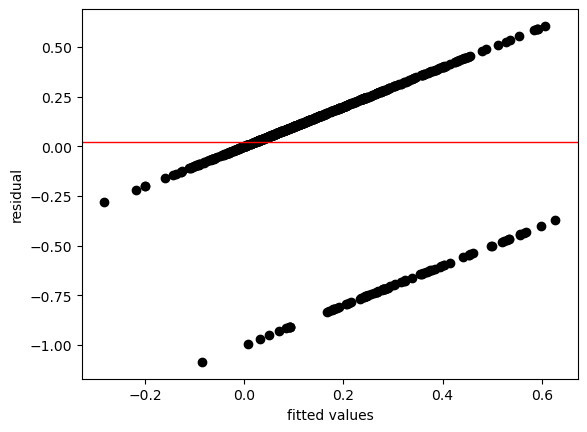

In [34]:
# Plotting the residuals
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In the residual plot above, the residuals are far from the mean which is not ideal. Therefore, perform heteroscedasticity test (Bartlett's test). 

# Heteroscedasticity test 

In [35]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject the null hypothesis.
# This would mean that there are patterns to the variance of the data

# Otherwise, should I identify no patterns, and accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


The test is used to test if variances across the sample are equal. It tests the null hypothesis.

-Outcome: Null hypothesis has established that the variance for all the datapoints are equal or homogeneous.

# Balance the data set

Conduct upsampling to ensure both X and y train have the same records.

In [36]:
# Define our X and y variables
X = df3.iloc[:, 0:]
y = df2['churn']

print(X.shape)
print(y.shape)

(3333, 13)
(3333,)


In [37]:
#Get the number of records for No(0) and Yes(1) on the colunm churn
no = df2[df2['churn'] == 0]
yes = df2[df2['churn'] == 1]

print(no.shape, yes.shape)

# Dataset is imbalanced, shown by 2850 records of no and 483 records of yes

(2850, 19) (483, 19)


In [38]:
# Since the dataset is small and want to guard against lose of information, perform upsampling(oversampling)
#Use RandomOverSampler to to handle the imbalanced data
!pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(sampling_strategy=1)
X_res, y_res = os.fit_resample(X,y)

#df2 = pd.read_csv('Syria_Telcom.csv')

In [39]:
# Confirm if the records are balanced
print(X_res.shape, y_res.shape)


(5700, 13) (5700,)


In [40]:
#Compare the original y values with the balanced y values

from collections import Counter

print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}". format(Counter(y_res)))

# This output gives an evidence that the dataset has been balanced, 2850 no values = 2850 yes values

Original dataset shape Counter({0: 2850, 1: 483})
Resampled dataset shape Counter({0: 2850, 1: 2850})


churn
0    2850
1    2850
Name: count, dtype: int64

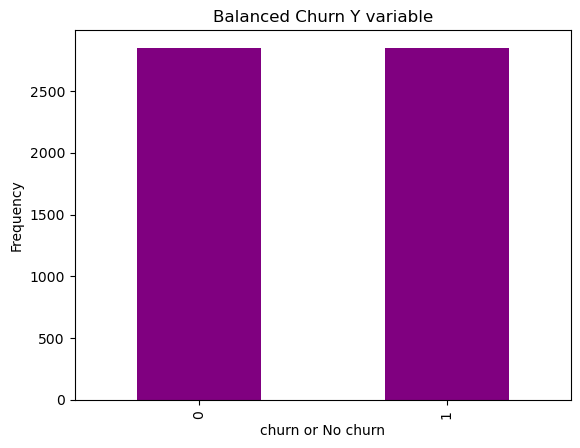

In [41]:
pd.value_counts(y_res).plot.bar(color = 'purple')
plt.title('Balanced Churn Y variable')
plt.xlabel('churn or No churn')
plt.ylabel('Frequency')
pd.value_counts(y_res)

In [42]:
# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [43]:
print(X_train.shape, y_train.shape)

(4560, 13) (4560,)


# 6. MODELLING


**a.) Random Forest Classifier Model**

In [44]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Perform a little parameter tuning to improve the performance of the model
params = {'n_estimators':[100,200,300,400,500], 'max_depth':[4,5,7,8,10], 'min_samples_split':[10,15,20,25]}
forest = RandomForestClassifier()
model = GridSearchCV(forest, params, cv=5, n_jobs=-1)

# Fitting the model
model.fit(X_train, y_train)
model.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}

In [45]:
# Making predictions based on the model trained
y_pred = model.predict(X_test)

In [46]:
# Create a comparison dataframe
comparison_frame = pd.DataFrame({
    'Actual': y_test.values, 
    'Predicted': y_pred.flatten() if y_pred.ndim > 1 else y_pred
})
comparison_frame.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [47]:
# Statistics of the comparison dataframe
comparison_frame.describe()

,Actual,Predicted
count,1140.000000,1140.000000
mean,0.486842,0.469298
std,0.500046,0.499276
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [48]:
# Assess the errors
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05789473684210526
Mean Squared Error: 0.05789473684210526
Root Mean Squared Error: 0.2406132515928939


**Observation**

We can see that the value of root mean squared error is 0.241 which is greater than 10% of the mean of the actual y.

RMSE value is close to 0, meaning that the algorithm is quite accurate and can make reasonably good predictions.



In [51]:
# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[562  23]
 [ 43 512]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       585
           1       0.96      0.92      0.94       555

    accuracy                           0.94      1140
   macro avg       0.94      0.94      0.94      1140
weighted avg       0.94      0.94      0.94      1140



**Observation**

-Out of the 585 actual 0(no records), only 23 were predicted to be 1 (yes records) or misclassified.

-Out of the 555 actual 1(yes records), only 43 were predicted to be 0 (no records) or misclassified.

-The Random Forest Classfier model has an accuracy of 94%. A recall rate of 96% for 1 identifies positive cases of customers prone to churn.

In [52]:
# Getting the numerical feature importances
test_features = df3.columns
importances = model.best_estimator_.feature_importances_

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sort the values in descending order, since I care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('account_length', 0.04), ('area_code', 0.01), ('international_plan', 0.11), ('number_vmail_messages', 0.05), ('total_day_calls', 0.04), ('total_day_charge', 0.27), ('total_eve_minutes', 0.09), ('total_eve_calls', 0.03), ('total_night_minutes', 0.05), ('total_night_calls', 0.03), ('total_intl_minutes', 0.06), ('total_intl_calls', 0.04), ('customer_service_calls', 0.19)]

Variable: total_day_charge     Importance: 0.27
Variable: customer_service_calls Importance: 0.19
Variable: international_plan   Importance: 0.11
Variable: total_eve_minutes    Importance: 0.09
Variable: total_intl_minutes   Importance: 0.06
Variable: number_vmail_messages Importance: 0.05
Variable: total_night_minutes  Importance: 0.05
Variable: account_length       Importance: 0.04
Variable: total_day_calls      Importance: 0.04
Variable: total_intl_calls     Importance: 0.04
Variable: total_eve_calls      Importance: 0.03
Variable: total_night_calls    Importance: 0.03
Variable: area_code            Importance: 0.0

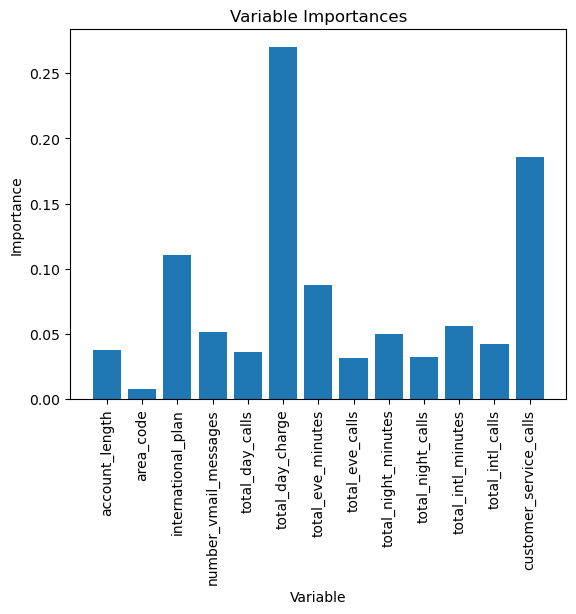

In [53]:
# Import matplotlib for plotting the importances
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))

# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical' )

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**b.) Logistic Regression Model**

In [54]:
# Fitting the model
from sklearn.linear_model import LogisticRegression

# Perform parameter tuning to improve the model performance using GridSearchCV

params = [
          {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
           'C' : [-4,1,2, 4, 5,20],
           'solver' : ['lbfgs', 'newton-cg', 'liblnear', 'sag', 'saga'],
           'max_iter' : [100, 1000, 2500, 500]
           }
]

from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
model = GridSearchCV(logreg, params, cv = 5, verbose = True, n_jobs = -1)

model.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [-4, 1, 2, 4, 5, 20],
                          'max_iter': [100, 1000, 2500, 500],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblnear', 'sag',
                                     'saga']}],
             verbose=True)

In [55]:
# Using the model to make a prediction
y_pred = model.predict(X_test)

In [56]:
# Create a comparison dataframe for the predicted and the original values
comparison_df = pd.DataFrame({"Actual" : y_test, "Predicted": y_pred})
comparison_df.head()

,Actual,Predicted
1436,0,0
748,0,0
4596,1,1
1448,0,1
2543,0,0


In [57]:
# Summary statistics for the comparison dataframe
comparison_df.describe()

,Actual,Predicted
count,1140.000000,1140.000000
mean,0.486842,0.509649
std,0.500046,0.500126
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [62]:
# Model evaluation
from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.21578947368421053
Mean Squared Error: 0.21578947368421053
Root Mean Squared Error: 0.4645314560761311


**Observation**

We can see that the value of root mean squared error is 0.464 which is way greater than 10% of the mean of the actual y.

This means that our algorithm was not very accurate and therefore won't make very good predictions.

In [63]:
# Evaluating the model performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[449 136]
 [110 445]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       585
           1       0.77      0.80      0.78       555

    accuracy                           0.78      1140
   macro avg       0.78      0.78      0.78      1140
weighted avg       0.79      0.78      0.78      1140



**Observation**
- Out of the 585 actual 0 (no records), 136 were predicted to 1 (yes records) or misclassified.

- Out of the 555 actual 1 (yes records), 110 were predicted to be 0 (no records) or misclassified.

- The Logistic Regression model has 78% accuracy. A precision rate of 80% indicates the model has a low psoitive rate in churn identification

- Random Forest Classifier performed better in comparison to this model.

**c.) GradientBoostingClassifier Model**

In [64]:
#Import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Conduct a little parameter tuning to improve the performance of our model
params = {'n_estimators':[2,3,4,5,6,7,8,9,13,11], 'max_depth':[4,5,7,8], 'learning_rate':[0.1,0.3,0.7,0.9]}
grad_b = GradientBoostingClassifier()
model = GridSearchCV(grad_b, params, cv=5)

# Fitting our model

model.fit(X_train,y_train)
model.best_params_

{'learning_rate': 0.7, 'max_depth': 8, 'n_estimators': 13}

In [65]:
# Making predictions#
y_gpred = model.predict(X_test)

In [66]:
# Comparison df
com_df = pd.DataFrame({"Actual": y_test , "Predicted": y_gpred})
com_df.head()

,Actual,Predicted
1436,0,0
748,0,0
4596,1,1
1448,0,0
2543,0,0


In [67]:
# Summary Statistics for the comparison dataset
com_df.describe()

,Actual,Predicted
count,1140.000000,1140.000000
mean,0.486842,0.503509
std,0.500046,0.500207
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [68]:
# Assessing the errors
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_gpred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_gpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_gpred)))

Mean Absolute Error: 0.016666666666666666
Mean Squared Error: 0.016666666666666666
Root Mean Squared Error: 0.12909944487358055


**Observation**

The value of root mean squared error is 0.129 which is greater than 10% of the mean of the actual y.

The RMSE value is closer to 0, showing that the algorithm will make good and accurate predictions

In [69]:
# Evaluating the model performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_gpred))
print(classification_report(y_test, y_gpred))

[[566  19]
 [  0 555]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       585
           1       0.97      1.00      0.98       555

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98      0.98      0.98      1140



**Observation**

- Out the 585 actual 0(no records), only 19 were predicted to be 1(yes records).

- Out of the 555 actual 1(yes records), and 0(no records).

- GradientBoostingClassifier model is 98% accurate. It is safe to conclude that this model performed better than Logistic Regression Model which had 77% but tied with RandomForestClassifier at 96%.



# **5. MODEL EVALUATION**



The classifier models used were ; Random Classifier Method, Logistic Regression and Gradient Boosting Classifier.

The Random Classifier Method had an accuracy of 94%, Logistic Regression Model had an accuracy of 78% and Gradient Boosting Model had 98%.

Overall, Gradient Boosting model had the best f1score at 98% indicative of balanced performance and highest accuracy at 98%


# 6. CONCLUSION


Gradient Boosting Model has the best performance metrics out of the the tree models evaluated. It is therefore best placed to predict customer churn based on our dataset.

# 7. RECOMMENDATIONS


a. Variable enrichment: The dataset could have been enhanced by inclduing additional variables like gender and age to better understand factors influencing customer churn.

b.Network coverage: Syriatel should check on network coverage on area code 415 as it has the highest number of customers likely to churn.

c.Upselling: SyriaTel could try convincing customers to take up extra packages to increase its profitability.

d.Introduction of new products: Syriatel could try reduce churn by introducing new packages not in their company like internet service or loyalty program where customers can earn points for consistent patronage of services already offered.
